In [1]:
import numpy as np
import pandas as pd

In [2]:
df_1=pd.read_csv("/kaggle/input/finalquoraquestionpairdataset1k/df_complete_1k.csv")
print(df_1.shape)

df_2=pd.read_csv("/kaggle/input/finalquoraquestionpairdataset/quoraQuestionPair_all_smaller.csv")
print(df_2.shape)

df_3=pd.read_csv("/kaggle/input/finalquoraquestionpairdataset/quoraQuestionPair_all.csv")
print(df_3.shape)

(1000, 629)
(10000, 628)
(100000, 628)


In [3]:
y_true=df_1['is_duplicate']
df_1.drop(['Unnamed: 0','is_duplicate','id'],inplace=True,axis=1)

In [4]:
df_1.columns

Index(['freq_qid1', 'freq_qid2', 'q1len', 'q2len', 'q1_n_words', 'q2_n_words',
       'freq_q1+freq_q2', 'freq_q1-freq_q2', 'word_Common', 'word_Total',
       ...
       '290_y', '291_y', '292_y', '293_y', '294_y', '295_y', '296_y', '297_y',
       '298_y', '299_y'],
      dtype='object', length=626)

In [5]:
print(type(y_true[0]))
y_true

<class 'numpy.int64'>


0      0
1      0
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    1
999    0
Name: is_duplicate, Length: 1000, dtype: int64

In [6]:
df_1

,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,freq_q1+freq_q2,freq_q1-freq_q2,word_Common,word_Total,...,290_y,291_y,292_y,293_y,294_y,295_y,296_y,297_y,298_y,299_y
0,1,1,66,57,14,12,2,0,10.0,23.0,...,-17.728562,7.229898,1.580402,-7.480173,0.318266,-11.848612,-11.259299,1.975314,3.580248,11.982262
1,1,1,51,88,8,13,2,0,4.0,20.0,...,21.999507,3.428149,-4.773299,6.977260,33.168795,6.048788,-26.775335,12.724544,-4.667538,32.800578
2,1,1,73,59,14,10,2,0,4.0,24.0,...,-23.508835,-1.212967,11.955933,9.665237,10.977271,0.941182,6.287876,0.236434,-12.186937,26.945597
3,1,1,50,65,11,9,2,0,0.0,19.0,...,13.256374,-3.985229,-11.852825,12.110637,-9.325283,-21.300626,-7.168450,-19.635510,2.136135,2.817453
4,1,1,76,39,13,7,2,0,2.0,20.0,...,-10.233260,-8.333499,-14.300048,-12.601072,-4.393098,12.445345,-11.596568,-16.201179,3.574593,-9.746282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,2,116,81,23,17,3,-1,3.0,37.0,...,4.874220,5.119074,8.144366,7.558178,15.807085,-7.163510,5.800205,11.982405,4.755039,-0.293505
996,1,1,60,88,11,16,2,0,4.0,27.0,...,-39.864976,5.712080,5.353398,6.567580,6.071125,-18.607011,-5.810576,-12.108495,15.232164,13.915835
997,1,1,78,56,11,10,2,0,0.0,21.0,...,-24.356205,11.477446,-5.451161,-6.956106,2.521532,-1.830874,-7.881928,-13.051609,14.272861,9.004446
998,1,1,145,137,24,24,2,0,13.0,46.0,...,-34.137295,9.833304,7.247615,6.646950,9.128487,16.120775,0.392695,-3.986141,-4.767093,13.597425


In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test =train_test_split(df_1,y_true,stratify=y_true, test_size=0.3)

print('Number of points in the X_train {}'.format(X_train.shape))
print('Number of points in the X_test {}'.format(X_test.shape))
print('Number of points in the y_train {}'.format(y_train.shape))
print('Number of points in the y_test {}'.format(y_test.shape))

Number of points in the X_train (700, 626)
Number of points in the X_test (300, 626)
Number of points in the y_train (700,)
Number of points in the y_test (300,)


In [8]:
from collections import Counter

train_dist=Counter(y_train)
test_dist=Counter(y_test)
len_train=len(y_train)
len_test=len(y_test)

print("-"*10,"Distribution of output variable in train ","-"*10)
print("Class 0: {}".format(train_dist[0]/len_train))
print("Class 1: {}\n".format(train_dist[1]/len_train))
print("-"*10,"Distribution of output variable in test ","-"*10)
print("Class 0: {}".format(test_dist[0]/len_test))
print("Class 1: {}".format(test_dist[1]/len_test))

---------- Distribution of output variable in train  ----------
Class 0: 0.62
Class 1: 0.38

---------- Distribution of output variable in test  ----------
Class 0: 0.62
Class 1: 0.38


In [9]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))

    plt.figure(figsize=(20,4))
    
    labels = [1,2]

    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

# 1. Building a Random Model to check worst LogLoss

Log loss on Test Data using Random Model 0.8971464553943499
Accuracy on Test Data using Random Model 0.48


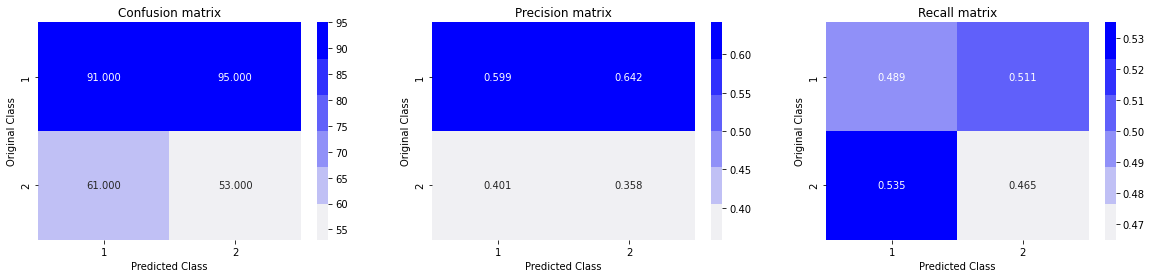

In [19]:
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

predicted_y = np.zeros((len_test,2))
for i in range(len_test):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))


predicted_y =np.argmax(predicted_y, axis=1)
print("Accuracy on Test Data using Random Model",accuracy_score(y_test, predicted_y))
plot_confusion_matrix(y_test, predicted_y)

# 2. Logistic Regression

log-loss by CalibratedClassifierCV 0.61555151873132
log-loss by SGDClassifier 6.386221424321325


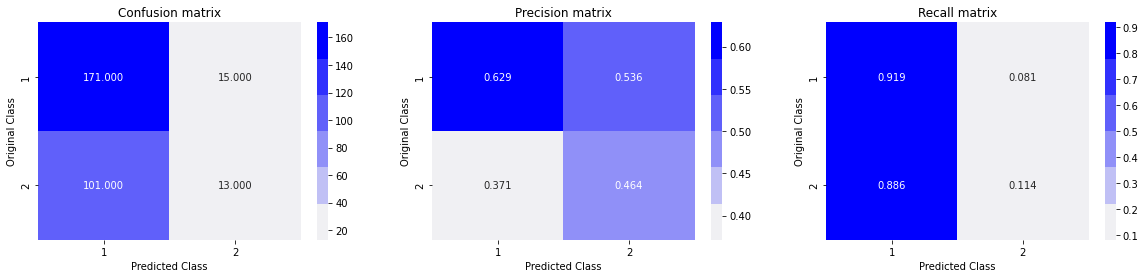

In [23]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV

clf=SGDClassifier(alpha=0.1,penalty='l2',loss='log', random_state=42)
clf.fit(X_train,y_train)
predict_y_wo_calib=clf.predict_proba(X_test)

sig_clf=CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train,y_train)
predict_y=sig_clf.predict_proba(X_test)

print("log-loss by CalibratedClassifierCV {}".format(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)))
print("log-loss by SGDClassifier {}".format(log_loss(y_test, predict_y_wo_calib, labels=clf.classes_, eps=1e-15)))

plot_confusion_matrix(y_test, np.argmax(predict_y,axis=1))

# Linear SVM

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


log-loss by SGDClassifier 0.6154250790728312


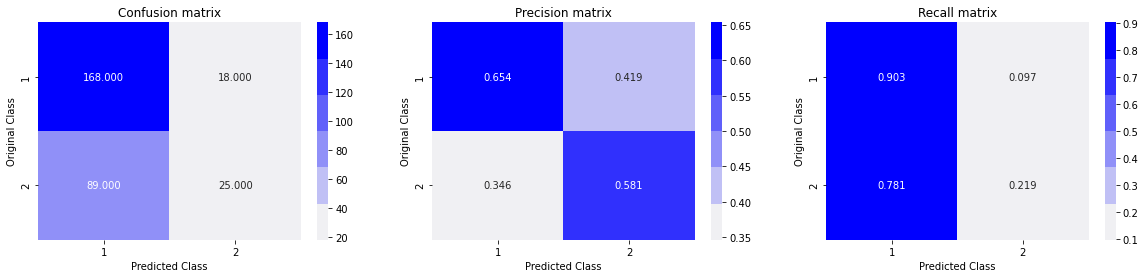

In [32]:


clf=SGDClassifier(alpha=1,penalty='l1',loss='hinge', random_state=42)
clf.fit(X_train,y_train)


sig_clf=CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train,y_train)
predict_y=sig_clf.predict_proba(X_test)

print("log-loss by SGDClassifier {}".format(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)))

plot_confusion_matrix(y_test, np.argmax(predict_y,axis=1))

<h2> 4.6 XGBoost </h2>

In [26]:
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(X_train,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

[0]	train-logloss:0.68396	valid-logloss:0.68793


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:571: FutureWarning: Pass `evals` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  format(", ".join(args_msg)), FutureWarning


[10]	train-logloss:0.61257	valid-logloss:0.64902
[20]	train-logloss:0.55707	valid-logloss:0.62452
[30]	train-logloss:0.51248	valid-logloss:0.60500
[40]	train-logloss:0.47339	valid-logloss:0.59023
[50]	train-logloss:0.44099	valid-logloss:0.57843
[60]	train-logloss:0.41340	valid-logloss:0.57012
[70]	train-logloss:0.38717	valid-logloss:0.56294
[80]	train-logloss:0.36139	valid-logloss:0.55647
[90]	train-logloss:0.34006	valid-logloss:0.55383
[100]	train-logloss:0.32074	valid-logloss:0.55070
[110]	train-logloss:0.30169	valid-logloss:0.54942
[120]	train-logloss:0.28427	valid-logloss:0.54666
[130]	train-logloss:0.26857	valid-logloss:0.54627
[140]	train-logloss:0.25522	valid-logloss:0.54578
[150]	train-logloss:0.24185	valid-logloss:0.54308
[160]	train-logloss:0.23020	valid-logloss:0.54254
[170]	train-logloss:0.21918	valid-logloss:0.54104
[180]	train-logloss:0.20883	valid-logloss:0.54212
[188]	train-logloss:0.20022	valid-logloss:0.54221
The test log loss is: 0.5415976896882058


Total number of data points : 300


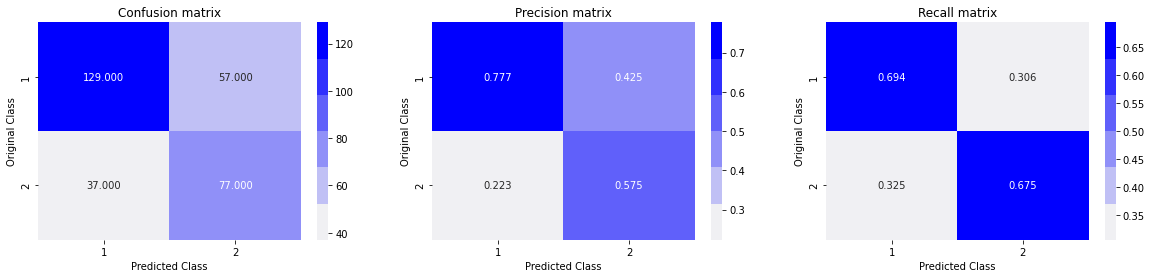

In [27]:
predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

# Saving Model

In [34]:
import pickle
saved_model = pickle.dumps(bst)


from joblib import Parallel, delayed
import joblib
  
  
# Save the model as a pickle in a file
joblib.dump(bst, 'bst_xgboost.pkl')

['bst_xgboost.pkl']